In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [2]:
# compare two graphs of a financial times with
# a simple line plot on the left and a filled line on the right

# load up some sample financial data
r = cbook.get_sample_data("goog.npz", np_load=True)["price_data"].view(np.recarray)
price_min = r.close.min()

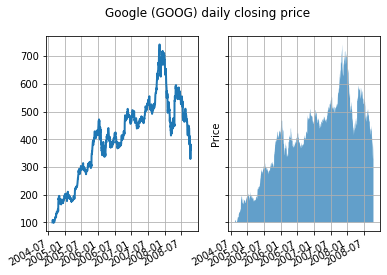

In [3]:
# create two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.plot(r.date, r.close, lw=2)
ax2.fill_between(r.date, price_min, r.close, alpha=0.7)

for ax in ax1, ax2:
    ax.grid(True)

ax.set_ylabel("Price")
for label in ax2.get_yticklabels():
    label.set_visible(False)

fig.suptitle("Google (GOOG) daily closing price")
fig.autofmt_xdate()
plt.show()

In [4]:
# computes two populations of random walkers with a different mean
# and standard deviation of the normal distributions

# fixing random state for reproducibility
np.random.seed(197996807)

n_steps, n_walkers = 100, 250
t = np.arange(n_steps)

# an (n_steps x n_walkers) array of random walk steps
s1 = 0.004 + 0.02 * np.random.randn(n_steps, n_walkers)
s2 = 0.002 + 0.01 * np.random.randn(n_steps, n_walkers)

# an (n_steps x n_walkers) array of random walker positions
x1 = s1.cumsum(axis=0)
x2 = s2.cumsum(axis=0)

# n_steps length arrays empirical means and standard deviations
# of both populations over time
mu1 = x1.mean(axis=1)
sigma1 = x1.std(axis=1)
mu2 = x2.mean(axis=1)
sigma2 = x2.std(axis=1)

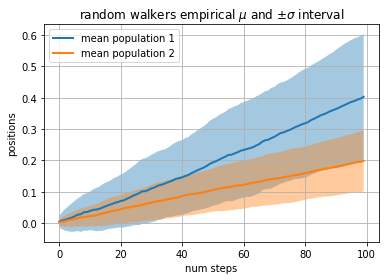

In [5]:
fig, ax = plt.subplots(1)

ax.plot(t, mu1, lw=2, label="mean population 1")
ax.plot(t, mu2, lw=2, label="mean population 2")
ax.fill_between(t, mu1 + sigma1, mu1 - sigma1, facecolor="C0", alpha=0.4)
ax.fill_between(t, mu2 + sigma2, mu2 - sigma2, facecolor="C1", alpha=0.4)

ax.set_title(r"random walkers empirical $\mu$ and $\pm \sigma$ interval")
ax.legend(loc="upper left")
ax.set_xlabel("num steps")
ax.set_ylabel("positions")
ax.grid()

plt.show()